# Confusion Matrix Analysis and Viewing Misclassifications

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# Training Parameters
batch_size = 128
epochs = 10

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

print(model.summary())


history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Number of Classes: 10
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________

#### Let's save our history file

In [2]:
import pickle 

pickle_out = open("MNIST_history.pickle","wb")
pickle.dump(history.history, pickle_out)
pickle_out.close()

#### Loading out saved history is as simple as these two lines

In [3]:
pickle_in = open("MNIST_history.pickle","rb")
saved_history = pickle.load(pickle_in)
print(saved_history)

{'val_loss': [0.055701112033799294, 0.03909952478017658, 0.03141241097645834, 0.028716618797858244, 0.029291980234533548, 0.02671308245745022, 0.025400733718276024, 0.025247172108944504, 0.026181924308935414, 0.026025392093812116], 'val_accuracy': [0.9825000166893005, 0.9869999885559082, 0.9886999726295471, 0.9904000163078308, 0.9901999831199646, 0.9909999966621399, 0.9916999936103821, 0.9914000034332275, 0.9914000034332275, 0.9919999837875366], 'loss': [0.2748753214875857, 0.08891979136367639, 0.06500104627807934, 0.05294593608677387, 0.04480896264861028, 0.04011242955078681, 0.03724733235538006, 0.03371689390614629, 0.03111940246745944, 0.027642626009136438], 'accuracy': [0.91496664, 0.9737833, 0.9809333, 0.98435, 0.98646665, 0.98795, 0.98866665, 0.98913336, 0.9905, 0.9914333]}


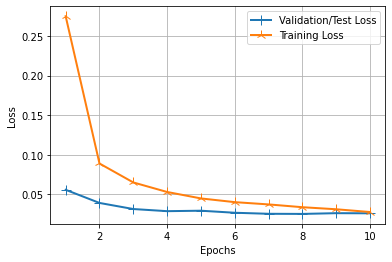

In [4]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '2', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

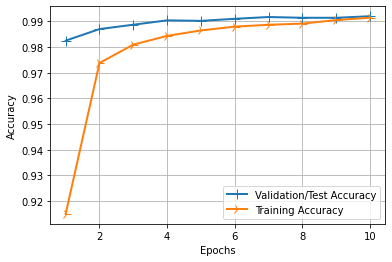

In [5]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

#### Now let's display our Confusion Matrix and Classification Report

In [6]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np


y_pred = np.argmax(model.predict(x_test), axis=-1)
y_test1 = np.argmax(y_test,axis=1)

print(classification_report(y_test1, y_pred))
print(confusion_matrix(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   2    1 1024    0    1    0    0    3    1    0]
 [   0    0    4  999    0    5    0    0    1    1]
 [   0    0    0    0  976   

### Displaying our misclassified data

In [8]:
import cv2
import numpy as np
from keras.datasets import mnist

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Use numpy to create an array that stores a value of 1 when a misclassification occurs
result = np.absolute(y_test - y_pred)
result_indices = np.nonzero(result > 0)

#  Display the indices of mislassifications
print("Indices of misclassifed data are: \n\n" + str(result_indices))

Indices of misclassifed data are: 

(array([ 259,  340,  445,  449,  582,  659,  938,  947,  965, 1014, 1039,
       1112, 1226, 1232, 1242, 1247, 1260, 1319, 1414, 1522, 1530, 1709,
       1717, 1790, 1901, 2035, 2043, 2070, 2098, 2109, 2118, 2129, 2130,
       2135, 2280, 2293, 2387, 2414, 2462, 2488, 2654, 2896, 2921, 2927,
       2939, 2953, 3030, 3422, 3503, 3520, 3558, 3727, 3808, 3941, 4007,
       4027, 4078, 4176, 4248, 4256, 4500, 4536, 4740, 4761, 4807, 4860,
       5937, 5955, 6091, 6576, 6597, 6625, 6651, 8246, 8408, 9009, 9015,
       9664, 9729, 9770], dtype=int64),)


### Displaying the misclassifications

In [9]:
import cv2 
#from keras.models import load_model

#classifier = load_model('/home/deeplearningcv/DeepLearningCV/Trained Models/mnist_simple_cnn.h5')

def draw_test(name, pred, input_im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0]*2 ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.putText(expanded_image, str(true_label), (250, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,0,255), 2)
    cv2.imshow(name, expanded_image)

for i in range(0,10):

    input_im = x_test[result_indices[0][i]]
    #print(y_test[result_indices[0][i]])
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC) 
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(model.predict_classes(input_im, 1, verbose = 0)[0])
    draw_test("Prediction", res, imageL, y_test[result_indices[0][i]]) 
    cv2.waitKey(0)

cv2.destroyAllWindows()